$$ {\huge \text{ Disciplina: Logica Fuzzy }\\  \\\text{REGRAS FUZZY}\\
   }\\
\ \  \ \ \ \ \ \ 
\ \ \ \ \ \ \ \ 
\ \ \ \ \ \ \  
\\
 { \it  \text{ Discente: Prof. Dr. João Fernando }  }
 \\
\text{ Monitor: Arnaldo Araújo} \\
\text{ Mestrado e Doutorado em Ciências da Computação - UFC }$$



In [1]:
#importar os pacotes necessários
import numpy as np
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 


## Explorando a implicação Zadeh (P ->Q ): { max [ (notP), min(P,Q)] }

### Raciocínio Aproximado 

#### Exemplo 5.09/5.10 Livro Texto

Suponhamos que estamos avaliando uma nova invenção para determinar seu potencial comercial. Vamos usar duas métricas para tomar nossas decisões sobre a inovação da idéia.Ou seja, determinar o potencial de impacto inovador do produto de acordo com a sua originalidade e pessoas impactadas. 

In [6]:
#Escala de inovação/originalidade
X =  np.arange(1,5,1)
#Escala tamanho de mercado
Y = np.arange(1,7,1)


In [7]:
#Conjunto inovação media
A = np.array([0.0,0.6,1,0.2])
#conjunto tamanho de mercado medio
B =  np.array([0.0,0.4,1,0.8,0.3,0.0])

In [8]:
A

array([ 0. ,  0.6,  1. ,  0.2])

In [9]:
B

array([ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ])

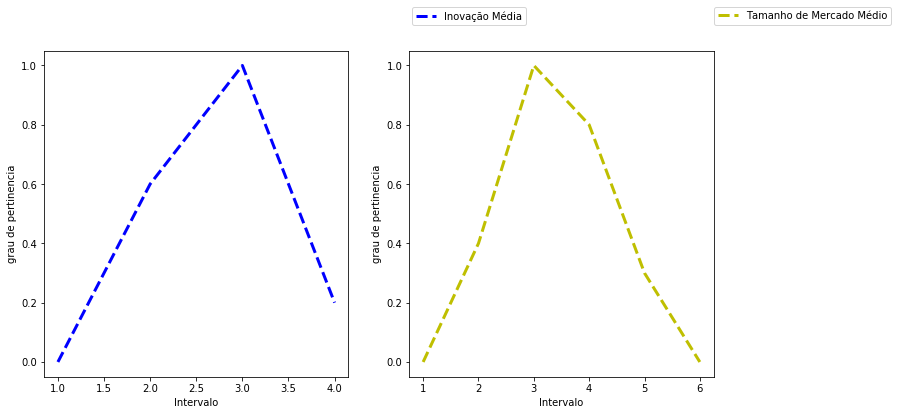

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
hax = fig.add_subplot(122)

ax.plot(X,A,'b--',linewidth=3,label='Inovação Média')
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Intervalo')
ax.set_ylim(-0.05, 1.05);
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))


hax.plot(Y,B,'y--',linewidth=3,label='Tamanho de Mercado Médio')
hax.set_ylabel('grau de pertinencia')
hax.set_xlabel('Intervalo')
hax.set_ylim(-0.05, 1.05);




hax.legend(loc='upper right')
hax.legend(bbox_to_anchor=(1.60, 1.15))

plt.show()

## Sabendo que A->B, como faríamos para encontrar um B' quando temos um novo A'???

## Determinar R que expressa A->B 



In [11]:
# se x está em A então y está em B
AxB = fuzz.cartprod(A,B)
AxB

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.6,  0.6,  0.3,  0. ],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0. ,  0.2,  0.2,  0.2,  0.2,  0. ]])

In [12]:
notA =  fuzz.fuzzy_not(A)
notA

array([ 1. ,  0.4,  0. ,  0.8])

In [14]:

notAXY = fuzz.cartprod(notA,Y)
notAXY

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.4,  0.4,  0.4,  0.4,  0.4,  0.4],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8]])

In [15]:
R = np.fmax(AxB,notAXY)
R

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.4,  0.4,  0.6,  0.6,  0.4,  0.4],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8]])

### DADO UM CONJUNTO QUASE INOVAÇÃO ( A2 ) - >
### Inferir o novo conjunto para tamanho de mercado

In [16]:
#definindo o novo conjunto (quase alta inovação)
A2 = np.array([0.5, 1,0.3,0])
A2

array([ 0.5,  1. ,  0.3,  0. ])

In [18]:
B2 = fuzz.maxmin_composition(A2,R)
B2

array([[ 0.5,  0.5,  0.6,  0.6,  0.5,  0.5]])

$\Large{\text{Outras Formas de Implicação}} \\  \ \ \ \ \ $


$ \large{\text{Considere que } R = A \rightarrow B}$

In [19]:
#implicação Clássica - max(B,1-A) ??????
ImpCla = fuzz.fuzzymath.classic_relation(A,B) # Implicação Zadeh
ImpCla                                        #max[AandB,1 - A]



array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.4,  0.4,  0.6,  0.6,  0.4,  0.4],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8]])

In [20]:
def ImplClassica(C1,C2): #max(B,1-A)
    l = C1.shape[0]
    c = C2.shape[0]
    NotC1 = fuzz.fuzzy_not(C2)
    ICl = np.zeros((l,c))
    for i in range(l):
        for j in range(c):
            ICl[i,j] = max(C2[j],NotC1[i])
    return ICl
    

In [21]:
TesImp = ImplClassica(A,B)
TesImp

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.6,  0.6,  1. ,  0.8,  0.6,  0.6],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.2,  0.4,  1. ,  0.8,  0.3,  0.2]])

In [22]:
#implicação Mamdani  - min(A,B)
ImplMamd = fuzz.fuzzymath.cartprod(A,B)
ImplMamd

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.6,  0.6,  0.3,  0. ],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0. ,  0.2,  0.2,  0.2,  0.2,  0. ]])

In [26]:
#implicação Lukasiewicz

def Lukasiewicz(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    Luk = np.ones((l,c))
    for i in range(l):
        for j in range(c):
            Luk[i,j] = min(1,abs(1-(C1[i]+C2[j])))
    return Luk
            

In [27]:
A

array([ 0. ,  0.6,  1. ,  0.2])

In [28]:
B

array([ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ])

In [29]:
ImplLuk = Lukasiewicz(A,B)
ImplLuk

array([[ 1. ,  0.6,  0. ,  0.2,  0.7,  1. ],
       [ 0.4,  0. ,  0.6,  0.4,  0.1,  0.4],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.8,  0.4,  0.2,  0. ,  0.5,  0.8]])

In [30]:
#Implicação Correlação Produto

def CoPr(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    CP = np.ones((l,c))
    for i in range(l):
        for j in range(c):
            CP[i,j] = (C1[i]*C2[j])
    return CP

In [31]:
ImplCorPro = CoPr(A,B)
ImplCorPro

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.24,  0.6 ,  0.48,  0.18,  0.  ],
       [ 0.  ,  0.4 ,  1.  ,  0.8 ,  0.3 ,  0.  ],
       [ 0.  ,  0.08,  0.2 ,  0.16,  0.06,  0.  ]])

In [32]:
#implicação Broweriana
def Broweriana(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    Brow = np.ones((l,c))
    for i in range(l):
        for j in range(c):
                if C1[i] <= C2[j]:
                    Brow[i,j] = 1
                else:
                    Brow[i,j] = C2[j]
    return Brow


In [33]:
ImpBrow = Broweriana(A,B)
ImpBrow

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0. ,  0.4,  1. ,  1. ,  0.3,  0. ],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0. ,  1. ,  1. ,  1. ,  1. ,  0. ]])

$$ \ \ \ \ \ \ \ \ \ \ \ \\
{\huge \text{ Representação do Conhecimento } }\\
\ \  \ \ \ \ 
\\
 { \it  \text{ Modificadores Linguísticos } }$$



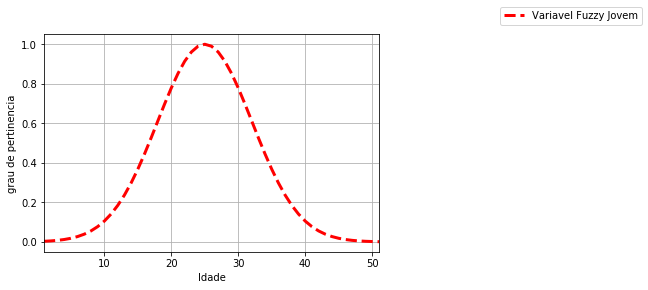

In [34]:
idade = np.arange(1,101,1)
jovem = fuzz.gaussmf(idade,25,10)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variavel Fuzzy Jovem')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

# Contrações

$\large{\text{MUITO } \alpha = \alpha^2}$


$ \large{\text{MUITO MUITO } \alpha = \alpha^4}$ 


$ \large{\text{MAIS } \alpha = \alpha^{1,25}}$ 

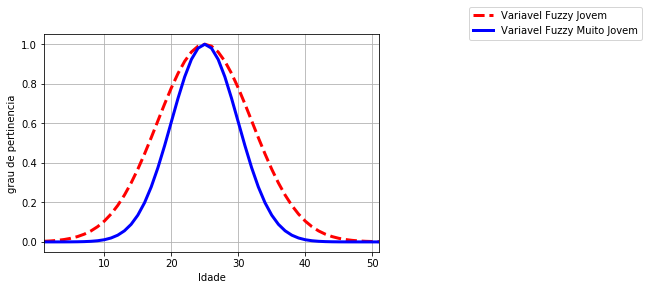

In [36]:
#Muito Jovem 
MuitoJovem = jovem**(2)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variavel Fuzzy Jovem')
ax.plot(idade,MuitoJovem,'b',linewidth=3,label='Variavel Fuzzy Muito Jovem')
ax.plot(idade,)
ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

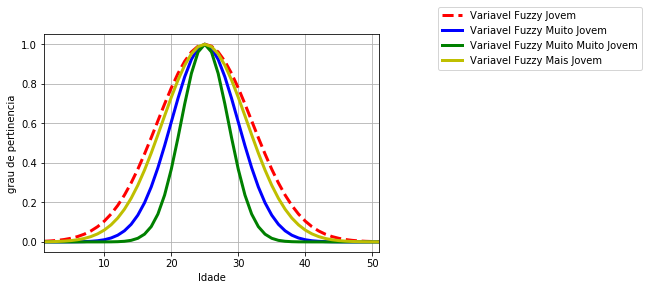

In [39]:
#Muito Muito Jovem 
MuitoMuitoJovem = jovem**(4)
MaisJovem = jovem**(1.25)

fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variavel Fuzzy Jovem')
ax.plot(idade,MuitoJovem,'b',linewidth=3,label='Variavel Fuzzy Muito Jovem')
ax.plot(idade,MuitoMuitoJovem,'g',linewidth=3,label='Variavel Fuzzy Muito Muito Jovem')
ax.plot(idade,MaisJovem,'y',linewidth=3,label='Variavel Fuzzy Mais Jovem')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

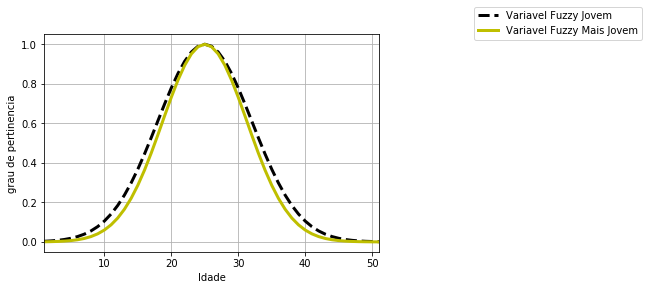

In [40]:
#mais Jovem 
MaisJovem = jovem**(1.25)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'k--',linewidth=3,label='Variavel Fuzzy Jovem')
ax.plot(idade,MaisJovem,'y',linewidth=3,label='Variavel Fuzzy Mais Jovem')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

#### Dilatações 

$\large{\text{ LIGEIRAMENTE }  \alpha = \sqrt{\alpha}}$

 $ \large{\text{MENOS } \alpha = \alpha^{0.75}}$ 

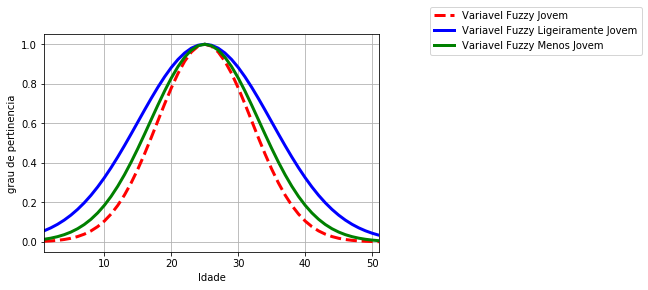

In [41]:
LigeiramenteJovem = jovem**(0.5)
MenosJovem = jovem**(0.75)
fig,ax = plt.subplots()

ax.plot(idade,jovem,'r--',linewidth=3,label='Variavel Fuzzy Jovem')
ax.plot(idade,LigeiramenteJovem,'b',linewidth=3,label='Variavel Fuzzy Ligeiramente Jovem')
ax.plot(idade,MenosJovem,'g',linewidth=3,label='Variavel Fuzzy Menos Jovem')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

#### Intensificação

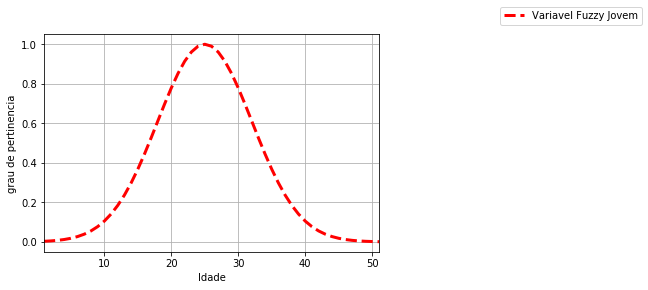

In [75]:
idade = np.arange(1,101,1)
jovem = fuzz.gaussmf(idade,25,10)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variavel Fuzzy Jovem')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

In [77]:
def Intensifica(X):
    tam = X.shape[0]
    IntenX = np.ones(tam)
    for i in range(tam):
        if X[i] <= 0.5:
            IntenX[i] = 2*((X[i]))**2
        else:
            IntenX[i] = 1-2*((1-(X[i]))**2)
    return IntenX
    

In [78]:
jovemInten = Intensifica(jovem)
jovemInten

array([  1.98590086e-05,   5.08386930e-05,   1.25043008e-04,
         2.95496720e-04,   6.70925256e-04,   1.46360484e-03,
         3.06762136e-03,   6.17743082e-03,   1.19520458e-02,
         2.22179931e-02,   3.96821895e-02,   6.80949095e-02,
         1.12269526e-01,   1.77843235e-01,   2.70670566e-01,
         3.95797398e-01,   5.53095095e-01,   6.99883379e-01,
         8.17200792e-01,   9.02141813e-01,   9.56277082e-01,
         9.85184318e-01,   9.96925064e-01,   9.99801988e-01,
         1.00000000e+00,   9.99801988e-01,   9.96925064e-01,
         9.85184318e-01,   9.56277082e-01,   9.02141813e-01,
         8.17200792e-01,   6.99883379e-01,   5.53095095e-01,
         3.95797398e-01,   2.70670566e-01,   1.77843235e-01,
         1.12269526e-01,   6.80949095e-02,   3.96821895e-02,
         2.22179931e-02,   1.19520458e-02,   6.17743082e-03,
         3.06762136e-03,   1.46360484e-03,   6.70925256e-04,
         2.95496720e-04,   1.25043008e-04,   5.08386930e-05,
         1.98590086e-05,

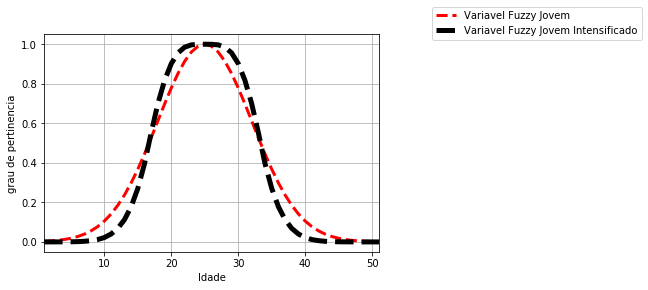

In [79]:
idade = np.arange(1,101,1)
jovem = fuzz.gaussmf(idade,25,10)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variavel Fuzzy Jovem')
ax.plot(idade,jovemInten,'k--',linewidth=5,label='Variavel Fuzzy Jovem Intensificado')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

# EXEMPLO DA FREQUÊNCIA DE PÚBLICO 

In [42]:
temp = np.arange(0, 46, 1) #interlavo da variável temperatura
pessoas = np.arange(0,101,1) #intervalo da variável pessoa
#funcoes de pertinencia para temperatura 
t_quente = fuzz.trimf(temp, [34, 47, 47])
t_moder =  fuzz.trapmf(temp, [10,21, 25, 36])
t_frio  = fuzz.trimf(temp, [0, 0, 15])
#funcoes de pertinencia para as pessoas
p_cheio =  fuzz.trimf(pessoas,[60,100,100])
p_moder =  fuzz.trapmf(pessoas,[20,40,60,80])
p_vazio =  fuzz.trimf(pessoas,[0,0,40]) 

In [43]:
## Operaç

## Conjunção 


In [44]:
# CONJUNÇÃO - Temperatura Quente e Público Cheiro (46, 101)
quenteAndCheio = fuzz.cartprod(t_quente,p_cheio)
quenteAndCheio

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.69230769,
         0.69230769,  0.69230769],
       [ 0.        ,  0.        ,  0.        , ...,  0.76923077,
         0.76923077,  0.76923077],
       [ 0.        ,  0.        ,  0.        , ...,  0.84615385,
         0.84615385,  0.84615385]])

In [45]:
#conjunção fuzzy
def ConFuzzy(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    CoF = np.zeros((l,c))
    for i in range(l):
        for j in range(c):
            CoF[i,j] = min(C1[i],C2[j])
    return CoF

In [46]:
quenteAndCheio2 = ConFuzzy(t_quente,p_cheio)
quenteAndCheio2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.69230769,
         0.69230769,  0.69230769],
       [ 0.        ,  0.        ,  0.        , ...,  0.76923077,
         0.76923077,  0.76923077],
       [ 0.        ,  0.        ,  0.        , ...,  0.84615385,
         0.84615385,  0.84615385]])

## Disjunção 

In [47]:
QuenteVCheio = fuzz.fuzzy_or(temp,t_quente,pessoas,p_cheio)
QuenteVCheio

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.07692308,  0.15384615,  0.23

In [48]:
#Disjunção fuzzy
def DisFuzzy(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    DiF = np.zeros((l,c))
    for i in range(l):
        for j in range(c):
            DiF[i,j] = max(C1[i],C2[j])
    return DiF

In [49]:
QuenteOuCheio = DisFuzzy(t_quente,p_cheio)
QuenteOuCheio

array([[ 0.        ,  0.        ,  0.        , ...,  0.95      ,
         0.975     ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.95      ,
         0.975     ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.95      ,
         0.975     ,  1.        ],
       ..., 
       [ 0.69230769,  0.69230769,  0.69230769, ...,  0.95      ,
         0.975     ,  1.        ],
       [ 0.76923077,  0.76923077,  0.76923077, ...,  0.95      ,
         0.975     ,  1.        ],
       [ 0.84615385,  0.84615385,  0.84615385, ...,  0.95      ,
         0.975     ,  1.        ]])

## NEGAÇÃO

In [50]:
NotT_quente = fuzz.fuzzy_not(t_quente) 
NotT_quente

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.92307692,  0.84615385,  0.76923077,  0.69230769,  0.61538462,
        0.53846154,  0.46153846,  0.38461538,  0.30769231,  0.23076923,
        0.15384615])

### Implicação Clássica

In [51]:
A

array([ 0. ,  0.6,  1. ,  0.2])

In [52]:
p_cheio

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.025,  0.05 ,  0.075,
        0.1  ,  0.125,  0.15 ,  0.175,  0.2  ,  0.225,  0.25 ,  0.275,
        0.3  ,  0.325,  0.35 ,  0.375,  0.4  ,  0.425,  0.45 ,  0.475,
        0.5  ,  0.525,  0.55 ,  0.575,  0.6  ,  0.625,  0.65 ,  0.675,
        0.7  ,  0.725,  0.75 ,  0.775,  0.8  ,  0.825,  0.85 ,  0.875,
        0.9  ,  0.925,  0.95 ,  0.975,  1.   ])

In [53]:
t_quente

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.07692308,  0.15384615,  0.23076923,  0.30769231,  0.38461538,
        0.46153846,  0.53846154,  0.61538462,  0.69230769,  0.76923077,
        0.84615385])

In [54]:
# Implicação - P -> Q  =  notP ou Q ( MOTIVAção = Será que se eu estiver com uma temperatura quente eu 
#terei uma quantidade de pessoas moderada na festa)
SePQ = fuzz.fuzzy_or(temp,NotT_quente,pessoas,p_cheio)
SePQ

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         0.92307692,  0.84615385,  0.76

## Exemplo Cálculo Gorjeta pela qualidade da comida e do serviço

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


OrderedDict([('tip', 13.695754222725178)])


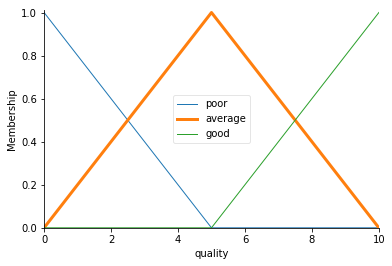

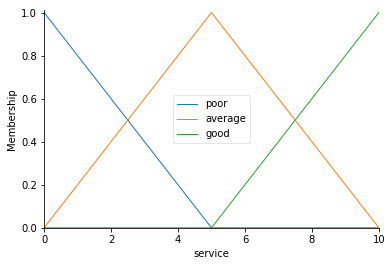

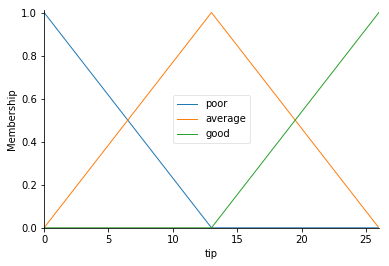

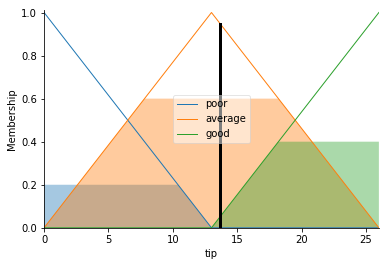

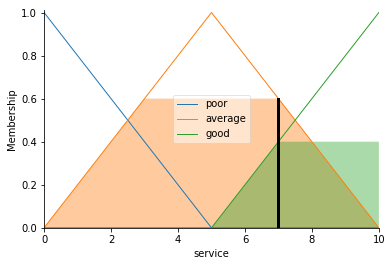

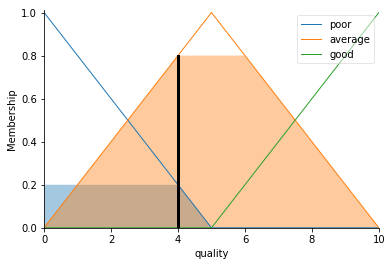

In [56]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# New Antecedent/Consequent objects hold universe variables and membership functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 27, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar, Pythonic API
tip['poor'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['average'] = fuzz.trimf(tip.universe, [0, 13, 26])
tip['good'] = fuzz.trimf(tip.universe, [13, 26, 26])

# You can see how these look with .view()
quality['average'].view()
service.view()
tip.view()

# Rule objects connect one or more antecedent membership functions with
# one or more consequent membership functions, using 'or' or 'and' to combine the antecedents.
#   * rule1: "If food is poor OR services is poor, then tip will be poor
#   * rule2: "If service is average, then tip will be average
#   * rule3: "If service is good OR food is good, then tip will be good
# & (AND) - O "E" Comercial representa o AND
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['poor'])
rule2 = ctrl.Rule(service['average'], tip['average'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['good'])

# Create a new ControlSystem with these rules added
# Note: it is possible to create an empty ControlSystem() and build it up interactively.
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# View the whole system

#tipping_ctrl.view()

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 4.0   #0
tipping.input['service'] = 7.0  #10.0
    
# Crunch the numbers
tipping.compute()

# Output available as a dict, for arbitrary number of consequents
print(tipping.output)
#tipping.print_state()
# Viewing the Consequent again after computation shows the calculated system
tip.view(sim=tipping)
service.view(sim=tipping)

quality.view(sim=tipping)

###############
# More sophesticated system

# Inputs: qualtiy, service, decor
# Outpus: Tip
# Intermediary: ambiance
